## import libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

## load dataset

In [5]:
raw = pd.read_csv('car_prices.csv', on_bad_lines='skip')
raw.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
485822,2014,Hyundai,Tucson,SE,suv,automatic,km8ju3ag7eu924260,pa,5.0,7126.0,silver,black,jba chevrolet,18350,18500,Fri May 29 2015 02:00:00 GMT-0700 (PDT)
347666,2007,Chrysler,Town and Country,Touring,Minivan,automatic,2a4gp54l77r209841,in,1.9,114988.0,blue,gray,santander consumer,3825,3200,Thu Feb 26 2015 02:10:00 GMT-0800 (PST)
172271,2013,BMW,7 Series,750Li,Sedan,automatic,wbaye8c50dde22228,ga,4.5,27532.0,white,beige,mercedes benz of buckhead,55000,54000,Thu Jan 22 2015 02:00:00 GMT-0800 (PST)
427995,2014,Chrysler,Town and Country,Touring,Minivan,NaN,2c4rc1bgxer443865,va,4.0,18846.0,gold,black,hertz corporation/gdp,19800,19900,Thu May 21 2015 01:50:00 GMT-0700 (PDT)
364253,2012,Chevrolet,Impala,LT Fleet,Sedan,automatic,2g1wg5e38c1101519,tx,2.5,63141.0,silver,gray,united acceptance,8850,6900,Thu Feb 26 2015 03:00:00 GMT-0800 (PST)


## 1. Descriptive Statistics

Observations :
- tipe kolom sudah sesuai
- ada beberapa fitur dengan missing value

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Features desc. <br>
- Date : The year of production of the cars.
- Make : The brand of the car.
- Model : The edition of the car of a specific brand.
- Trim : The trim levels for a car are just different versions of the model.
- Body : The body style of a vehicle refers to the shape and model of a particular car make.
- Transmission : The mechanism that moves the power from the engine to the wheels.
- VIN : Vehichel identification number.
- State : The state in which the car is auctioned.
- Condition : The condition of the cars being at the time of auction.
- Odometer : The distance the car has travelled since manufactured.
- Color : Exterior color of the car.
- Interior : Interior color of the car.
- Seller : The seller of the car, car dealers.
- mmr : Manhiem market record, the market estimated price of the cars.
- sellingprice : The price a car was sold at auctions.
- saledate : The date on which the car has been sold.

Observations :
- rata2 tahun mobil adalah 2010, mediannya 2012, mobil paling tua tahun 1982, paling baru tahun 2015
- kondisi kendaraan rata2 3.4, median 3.6 artinya rata2 kondisinya tidak buruk dan nilainy normal untuk mobil bekas
- rata2 odomoter mobil di 68,323 miles (109,955 km), median 52,256 (84,097.88 km) artinya rata2 mobil sering digunakan dan nilainya normal untuk mobil bekas
- rata2 harga mmr 13,611 USD (203,845,141 IDR), median 12,100 USD (181,215,650 IDR) artinya rata2 harganya normal untuk mobil bekas (di US) 
- rata2 harga mmr 13,769 USD (206,218,313 IDR), median 12,250 USD (183,468,250 IDR) artinya prediksi mmr tidak berbeda jauh dengan harga jual sebenarnya

In [7]:
raw.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [23]:
cat = ['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']
num = ['year', 'condition', 'odometer', 'mmr']

Observations :
- `make`, `model`, `trim` dan `body` terlalu banyak unique value akan dikelompokkan berdasarkan harga
- `vin`, `seller` dan `saledate` akan didrop karena tidak dapat digunakan untuk melakukan prediksi harga (machine learning)

In [74]:
for i in cat:
    raw[i] = raw[i].str.lower()

In [76]:
raw[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,66,851,1901,45,2,550296,38,20,17,14264,3745
top,ford,altima,base,sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,tue feb 10 2015 01:30:00 gmt-0800 (pst)
freq,93997,19349,55842,241343,475914,5,82945,110970,244325,19693,5334


## 2. Univariate Analysis

Observations:<br>
- `odometer`,`mmr` memiliki distribusi yang positively skewed, jika diperlukan bisa dilakukan log transformation
- `year` memiliki distribusi yang negatively skewed, dapat dilakukan transformation atau dibiarkan

### box plot

- Pada fitur `year` ada outliers tapi masih masuk akal ada mobil tahun 1980 - 2000
- `Odomtere` dan `mmr` juga memiliki outliers yang masih masuk akal

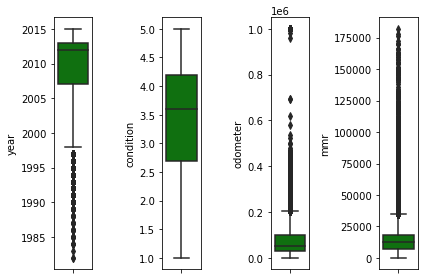

In [11]:
features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=raw[features[i]], color='green', orient='v')
    plt.tight_layout()

### distribution

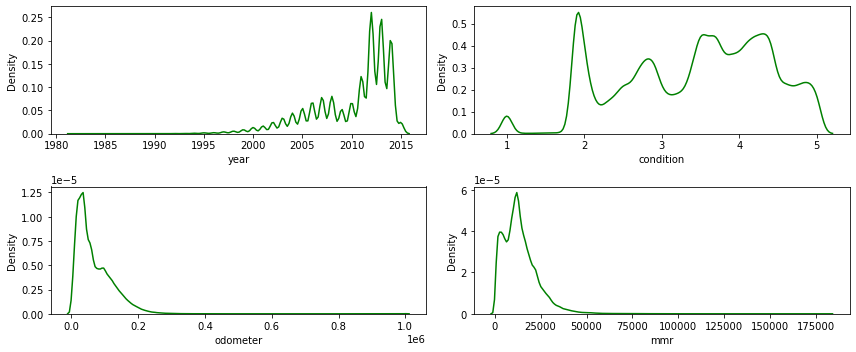

In [18]:
features = num
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, round(len(num)/2), i+1)
    sns.kdeplot(x=raw[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

### violin plot

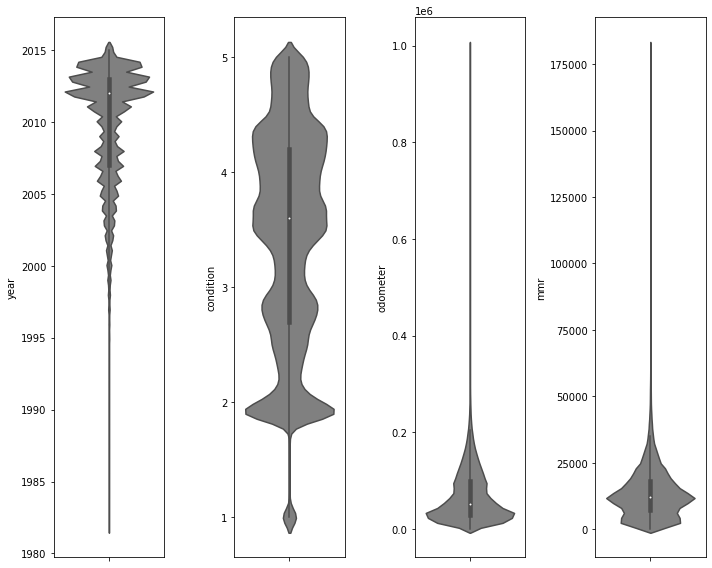

In [24]:
plt.figure(figsize=(10,8))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=raw[num[i]], color='gray', orient='v')
    plt.tight_layout()

### count plot

- `transmission` didominasi oleh automatic, fitur bisa didrop untuk machine learning
- fitur kategorikal lain dapat dikelompokkan untuk mengurangi kardinalitas

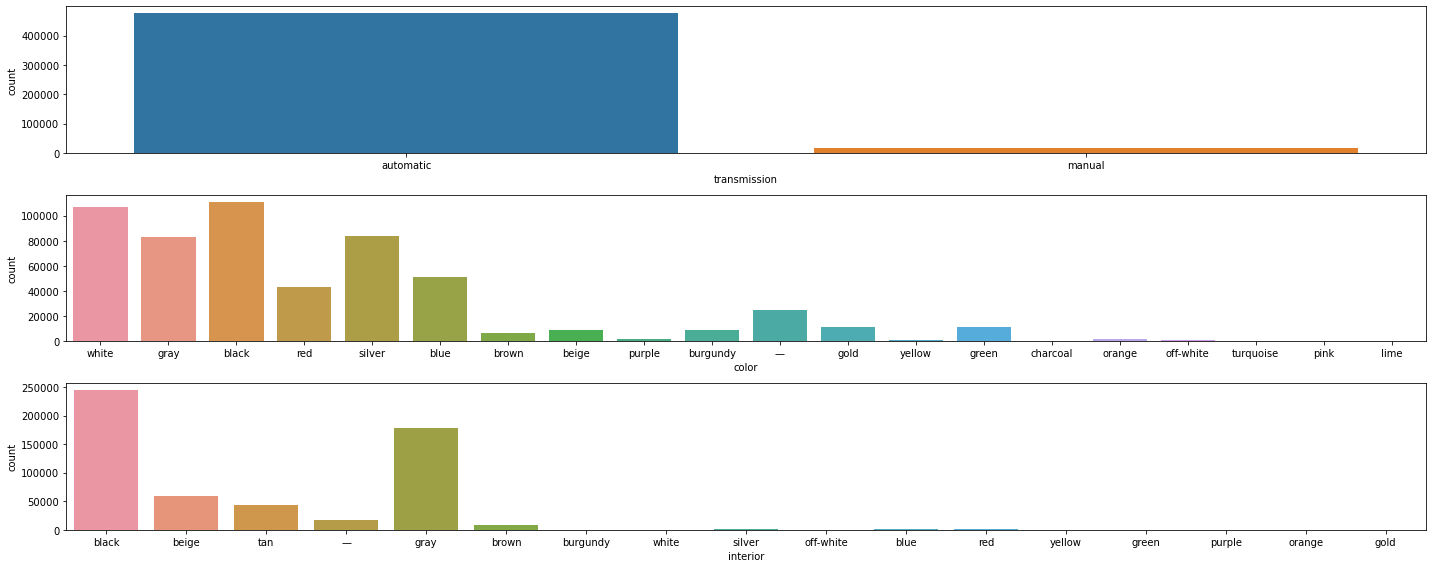

In [33]:
cat_count = ['transmission', 'color', 'interior']
plt.figure(figsize=(20,8))
for i in range(0, len(cat_count)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x = raw[cat_count[i]], orient='v')
    plt.tight_layout()

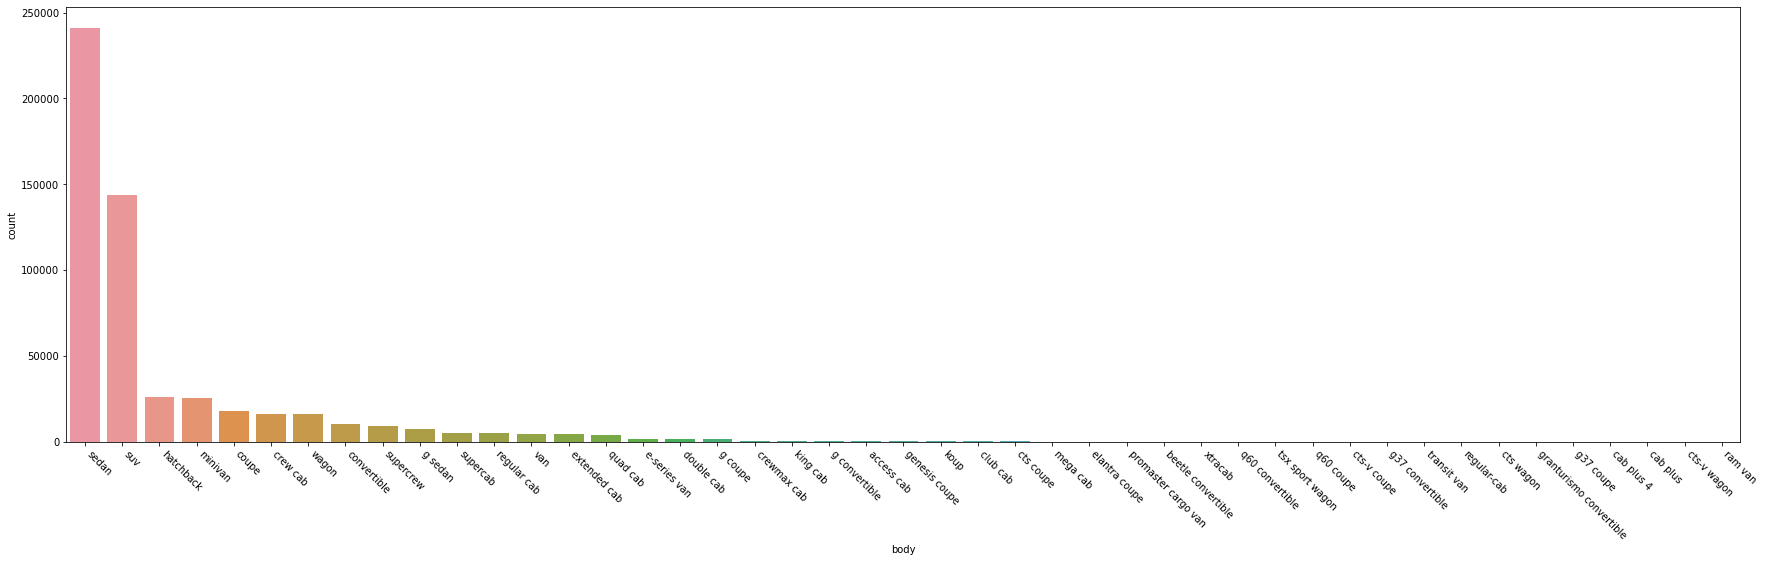

In [77]:
plt.figure(figsize=(30,8))
sns.countplot(x=raw['body'],
              order = raw['body'].value_counts().index
             )
plt.xticks(rotation=-45,ha='left');

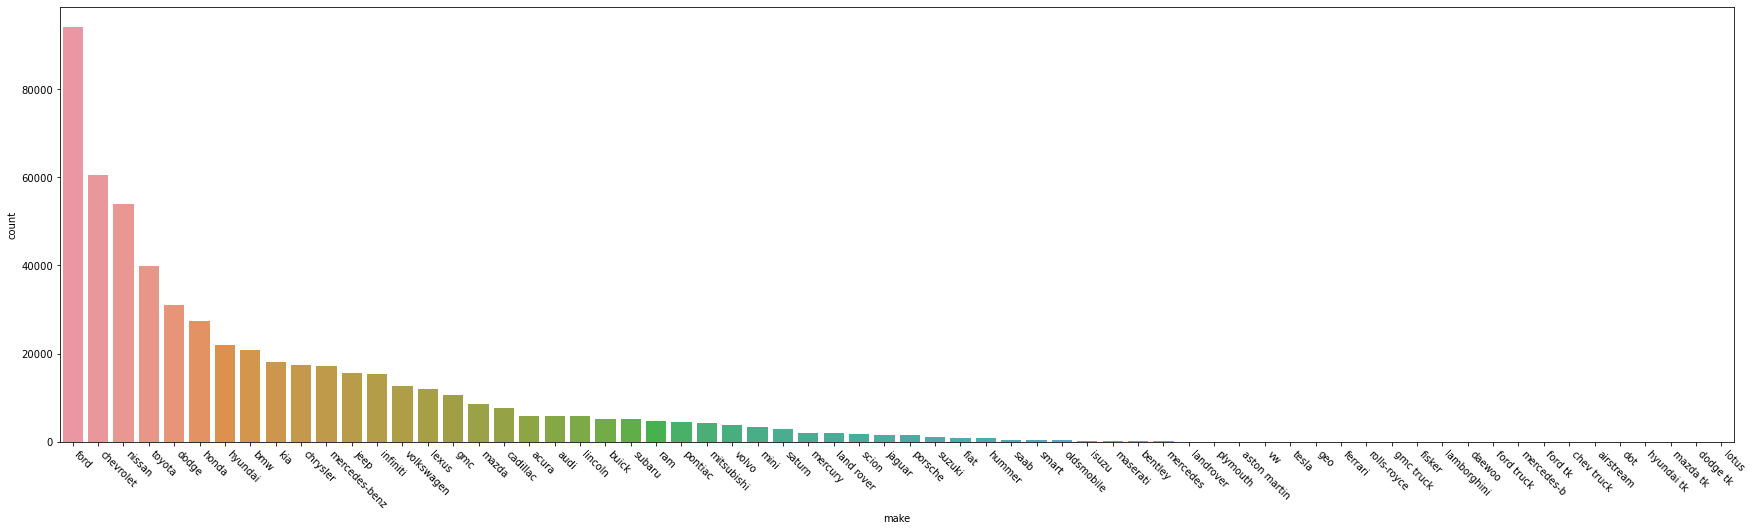

In [78]:
plt.figure(figsize=(30,8))
sns.countplot(x=raw['make'],
              order = raw['make'].value_counts().index
             )
plt.xticks(rotation=-45,ha='left');

## 3. Multivariate Analysis

### correlation

- target supervised learning `sellingprice`
- `mmr` tidak digunakan pada machine learning, akan digunakan sebagai pembanding dengan model baru
- semua fitur numerikal punya korelasi yang cukup tinggi artinya dapat digunakan untuk prediksi `sellingprice` semua

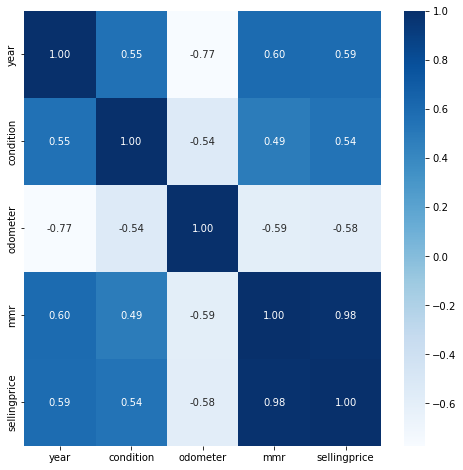

In [47]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw.corr(), cmap='Blues', annot=True, fmt='.2f');

In [81]:
categorical_features = identify_nominal_columns(raw)
categorical_features

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

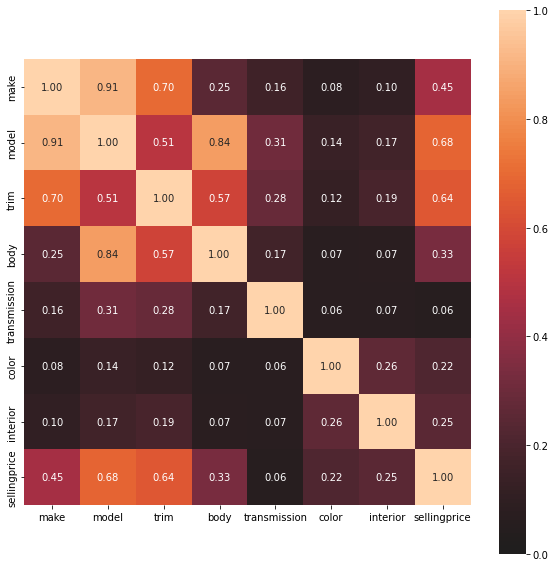

In [87]:
complete_correlation = associations(raw[['make','model','trim','body','transmission','color','interior','sellingprice']], filename= 'complete_correlation.png', figsize=(10,10))

In [92]:
df_complete_corr = complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,make,model,trim,body,transmission,color,interior,sellingprice
make,1.00,0.91,0.70,0.25,0.16,0.08,0.10,0.45
model,0.91,1.00,0.51,0.84,0.31,0.14,0.17,0.68
trim,0.70,0.51,1.00,0.57,0.28,0.12,0.19,0.64
body,0.25,0.84,0.57,1.00,0.17,0.07,0.07,0.33
transmission,0.16,0.31,0.28,0.17,1.00,0.06,0.07,0.06
color,0.08,0.14,0.12,0.07,0.06,1.00,0.26,0.22
interior,0.10,0.17,0.19,0.07,0.07,0.26,1.00,0.25
sellingprice,0.45,0.68,0.64,0.33,0.06,0.22,0.25,1.00


- harga mobil yang di-produksi sebelum tahun 2000 cenderung murah
- harga mobil yang `condition`-nya di bawah 2 cenderung murah
- harga mobil yang nilai odometernya rendah cenderung mahal

<Figure size 1080x1080 with 0 Axes>

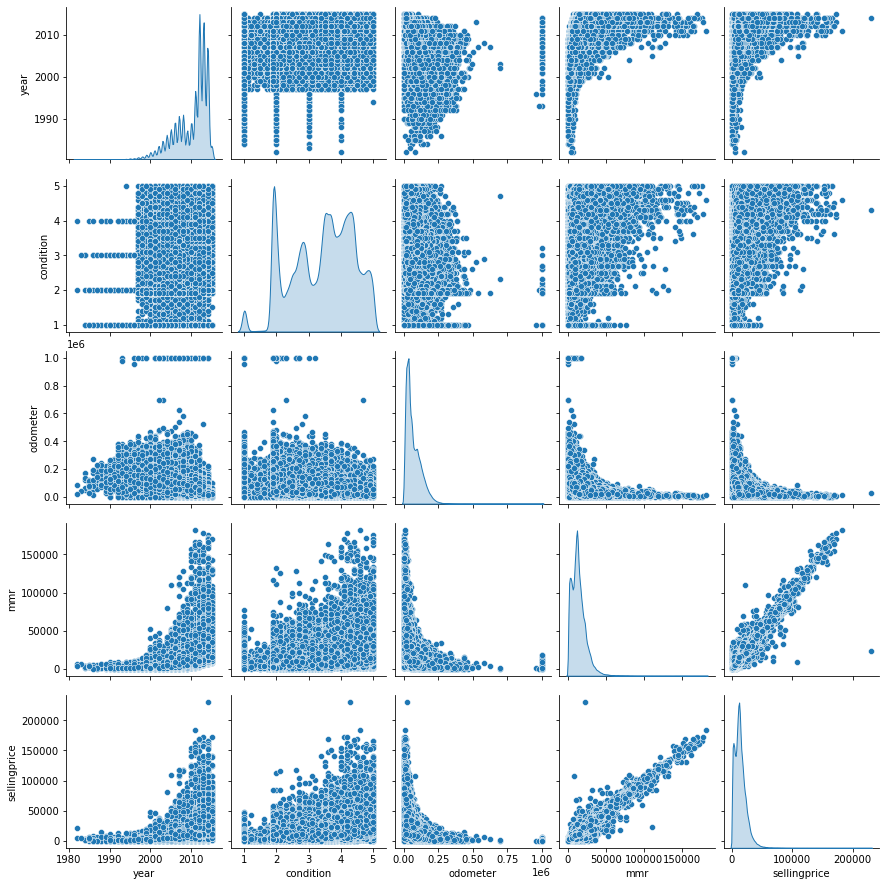

In [46]:
plt.figure(figsize=(15, 15))
sns.pairplot(raw, diag_kind='kde');

- harga rata2 dan median mobil automatic lebih mahal dibanding mobil manual, mobil manual biasanya mobil lama

In [60]:
raw.groupby('transmission').agg({'sellingprice':['mean','median']})

sellingprice         
                      mean   median
transmission                       
automatic     13540.322388  12100.0
manual        11211.448358   8600.0

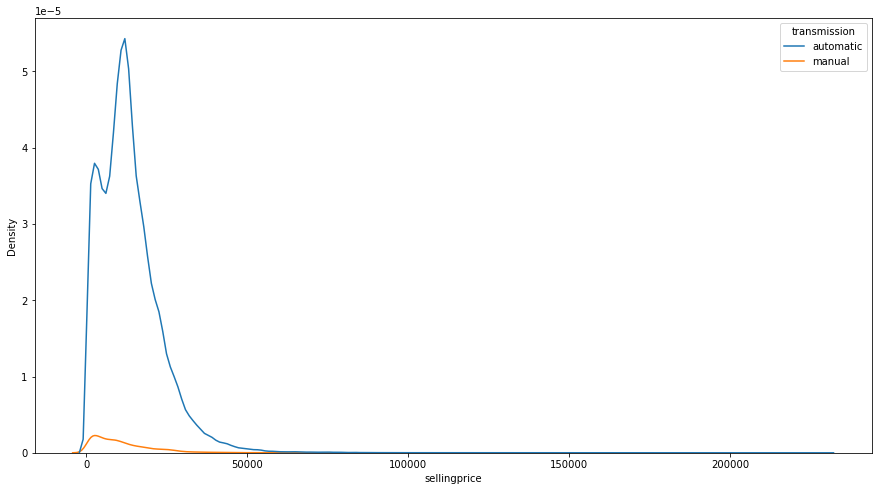

In [58]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=raw, x='sellingprice', hue='transmission');

- harga rata2 dan median mobil berwarna black, brown, charcoal, off-white, white lebih mahal dari warna lain
- harga rata2 dan median mobil berwarna beige, gold, green, lime, pink, turquoise di bawah 10,000 USD (149,375,500 IDR), kemungkinan warna2 tersebut harganya jatuh ketika jadi mobil bekas

In [61]:
raw.groupby('color').agg({'sellingprice':['mean','median']})

sellingprice         
                   mean   median
color                           
beige       9431.169269   7600.0
black      15508.967721  13500.0
blue       11440.610395  10500.0
brown      15352.808099  14000.0
burgundy   11902.997548  11400.0
charcoal   16247.496868  13800.0
gold        8324.714953   6100.0
gray       13951.274292  12500.0
green       8301.808733   5600.0
lime       13256.666667   8200.0
off-white  15230.229814  13600.0
orange     12787.109240  11100.0
pink       11746.428571   9400.0
purple     11969.684817  12000.0
red        12688.912002  11600.0
silver     11780.854813  10600.0
turquoise   8374.478814   7000.0
white      14740.549305  13200.0
yellow     12652.202335  10400.0
—          17819.737249  16000.0

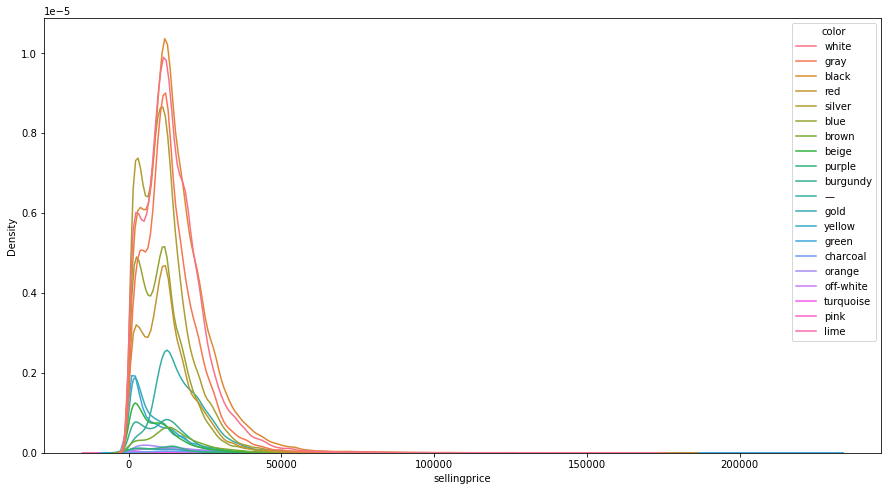

In [62]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=raw, x='sellingprice', hue='color');

- harga rata2 dan median mobil dengan interior brown, burgundy, off-white, orange, white lebih tinggi dibanding warna lain. 

In [63]:
raw.groupby('interior').agg({'sellingprice':['mean','median']})

sellingprice         
                   mean   median
interior                        
beige      13348.510794  12000.0
black      15679.434135  13800.0
blue        8237.038664   3900.0
brown      20241.964815  18750.0
burgundy   19664.136126  16500.0
gold       11420.061728  10050.0
gray       11026.832146  10000.0
green      10049.183673   8600.0
off-white  29045.989583  28750.0
orange     19569.310345  15500.0
purple     13198.085546  11000.0
red        23818.635026  20100.0
silver     10697.179254   9000.0
tan        12387.274012  10800.0
white      18669.154762  15050.0
yellow     18515.000000   9850.0
—          10593.138908   7700.0

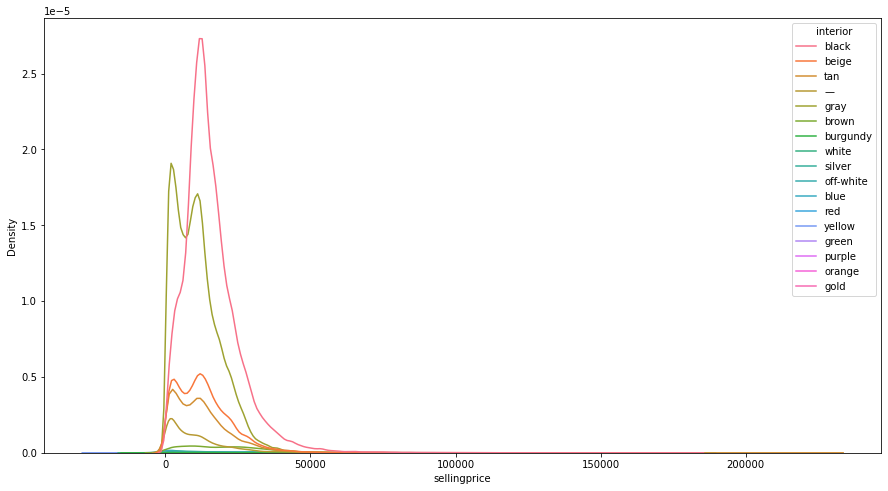

In [64]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=raw, x='sellingprice', hue='interior');